In [3]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def get_CIFAR10_data(num_training=49000, num_val=1000, num_test=1000, num_dev=500):
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    mask = np.arange(num_training, num_training+num_val)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = np.arange(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = np.arange(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    X_train = X_train.reshape((X_train.shape[0],-1))
    X_val = X_val.reshape((X_val.shape[0],-1))
    X_test = X_test.reshape((X_test.shape[0],-1))
    X_dev = X_dev.reshape((X_dev.shape[0],-1))
    
    mean_img = np.mean(X_train, axis=0)
    X_train -= mean_img
    X_val -= mean_img
    X_test -= mean_img
    X_dev -= mean_img
    
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1))))
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    X_dev = np.hstack((X_dev, np.ones((X_dev.shape[0], 1))))
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev

    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


In [5]:
from cs231n.classifiers.softmax import softmax_loss_naive
from cs231n.gradient_check import grad_check_sparse
import time

W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0)
print('loss: %f' % loss)
print('sanity check: %f' % (np.log(10)))

f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

loss: 2.335552
sanity check: 2.302585
numerical: -0.272258 analytic: -0.272259, relative error: 1.730940e-07
numerical: 1.610883 analytic: 1.610883, relative error: 2.820299e-08
numerical: -4.121773 analytic: -4.121773, relative error: 4.049360e-09
numerical: -0.511019 analytic: -0.511019, relative error: 1.179668e-07
numerical: 0.329540 analytic: 0.329540, relative error: 7.765497e-09
numerical: 0.406474 analytic: 0.406474, relative error: 3.647645e-08
numerical: 1.439669 analytic: 1.439668, relative error: 4.544701e-08
numerical: 0.865497 analytic: 0.865497, relative error: 4.697240e-09
numerical: 1.384401 analytic: 1.384401, relative error: 3.211594e-08
numerical: 0.218452 analytic: 0.218452, relative error: 1.385402e-07


In [6]:
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
print('loss: %f' % loss)
print('sanity check: %f' % (np.log(10)))

f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

loss: 2.358530
sanity check: 2.302585
numerical: 0.233061 analytic: 0.233061, relative error: 9.693452e-08
numerical: 1.076624 analytic: 1.076624, relative error: 4.479272e-08
numerical: 0.503752 analytic: 0.503752, relative error: 8.706166e-08
numerical: -0.248653 analytic: -0.248653, relative error: 7.624903e-08
numerical: 1.160039 analytic: 1.160039, relative error: 1.265236e-08
numerical: -2.210544 analytic: -2.210544, relative error: 1.374896e-08
numerical: -0.423580 analytic: -0.423580, relative error: 5.426503e-08
numerical: 0.538028 analytic: 0.538028, relative error: 7.784964e-08
numerical: -1.520315 analytic: -1.520315, relative error: 6.694095e-08
numerical: 2.722723 analytic: 2.722723, relative error: 4.120231e-10


In [7]:
from cs231n.classifiers.softmax import softmax_loss_vectorized

loss, grad = softmax_loss_vectorized(W, X_dev, y_dev, 0)
print('loss: %f' % loss)
print('sanity check: %f' % (np.log(10)))

f = lambda w: softmax_loss_vectorized(w, X_dev, y_dev, 0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

loss: 2.343132
sanity check: 2.302585
numerical: 0.646640 analytic: 0.646640, relative error: 1.314349e-08
numerical: -0.994996 analytic: -0.994996, relative error: 3.863588e-08
numerical: -0.557622 analytic: -0.557622, relative error: 6.789051e-08
numerical: 0.761707 analytic: 0.761707, relative error: 1.101823e-07
numerical: 0.417492 analytic: 0.417492, relative error: 2.649655e-09
numerical: 1.453960 analytic: 1.453960, relative error: 4.511221e-08
numerical: 0.153557 analytic: 0.153557, relative error: 2.228311e-07
numerical: 0.443247 analytic: 0.443247, relative error: 2.909782e-08
numerical: -0.773126 analytic: -0.773126, relative error: 3.057113e-08
numerical: -2.112620 analytic: -2.112620, relative error: 8.797299e-09


In [8]:
loss, grad = softmax_loss_vectorized(W, X_dev, y_dev, 5e1)
print('loss: %f' % loss)
print('sanity check: %f' % (np.log(10)))

f = lambda w: softmax_loss_vectorized(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

loss: 2.358530
sanity check: 2.302585
numerical: 1.451626 analytic: 1.451626, relative error: 2.375838e-08
numerical: 0.143450 analytic: 0.143450, relative error: 6.958209e-08
numerical: 3.903430 analytic: 3.903429, relative error: 1.365625e-08
numerical: 0.140137 analytic: 0.140137, relative error: 5.167515e-08
numerical: 0.655217 analytic: 0.655217, relative error: 9.418514e-09
numerical: -1.901482 analytic: -1.901482, relative error: 2.828045e-09
numerical: -0.127904 analytic: -0.127904, relative error: 6.915404e-08
numerical: 0.933837 analytic: 0.933837, relative error: 6.885038e-09
numerical: -2.458807 analytic: -2.458808, relative error: 1.716135e-08
numerical: -0.076724 analytic: -0.076724, relative error: 1.031346e-06


In [9]:
tic = time.time()
loss_naive, grads_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vec, grads_vec = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vec, toc - tic))
print('Loss difference: %f' % np.abs(loss_naive - loss_vec))

difference = np.linalg.norm(grads_vec-grads_naive, ord='fro')
print('Gradient difference: %f' % difference)

naive loss: 2.343132e+00 computed in 0.020376s
Vectorized loss: 2.343132e+00 computed in 0.006639s
Loss difference: 0.000000
Gradient difference: 0.000000


In [10]:
from cs231n.classifiers import Softmax

In [13]:
learning_range = [1e-7, 5e-5]
regularization_range = [2.5e4, 5e4]

results = {}
best_val = -1
best_softmax = None

num_iter = 1500
learning_rates = np.linspace(learning_range[0], learning_range[1], 5)
regularization_rates = np.linspace(regularization_range[0], regularization_range[1], 5)

for lr in learning_rates:
    for reg in regularization_rates:
        softmax = Softmax()
        loss_his = softmax.train(X_train, y_train, learning_rate=lr, reg=reg, num_iters=num_iter, batch_size=200, verbose=False)
        
        y_train_pred = softmax.predict(X_train)
        train_acc = np.mean(y_train_pred==y_train)
        
        y_val_pred = softmax.predict(X_val)
        val_acc = np.mean(y_val_pred==y_val)
        
        results[(lr, reg)] = (train_acc, val_acc)
        
        if val_acc > best_val:
            best_val = val_acc
            best_softmax = softmax

for (lr, reg) in sorted(results):
    (train_acc, val_acc) = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_acc, val_acc))
        
print('best validation accuracy achieved during cross-validation: %f' % best_val) 

/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/softmax.py:43: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(correct_score/np.sum(stable_scores, axis=1)))
/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/softmax.py:44: RuntimeWarning: overflow encountered in double_scalars
  loss = loss/N + reg*np.sum(W*W)
/home/lzhang/anaconda3/envs/cs231n/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/softmax.py:44: RuntimeWarning: overflow encountered in multiply
  loss = loss/N + reg*np.sum(W*W)
/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/softmax.py:46: RuntimeWarning: overflow encountered in multiply
  dW = dW/N + 2*reg*W
/home/lzhang/anaconda3/envs/cs231n/lib/python3.6/site-packages/numpy/core/_methods.p

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.334082 val accuracy: 0.344000
lr 1.000000e-07 reg 3.125000e+04 train accuracy: 0.319592 val accuracy: 0.336000
lr 1.000000e-07 reg 3.750000e+04 train accuracy: 0.316592 val accuracy: 0.332000
lr 1.000000e-07 reg 4.375000e+04 train accuracy: 0.307694 val accuracy: 0.324000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.308082 val accuracy: 0.319000
lr 1.257500e-05 reg 2.500000e+04 train accuracy: 0.149061 val accuracy: 0.148000
lr 1.257500e-05 reg 3.125000e+04 train accuracy: 0.094755 val accuracy: 0.102000
lr 1.257500e-05 reg 3.750000e+04 train accuracy: 0.074041 val accuracy: 0.068000
lr 1.257500e-05 reg 4.375000e+04 train accuracy: 0.105122 val accuracy: 0.099000
lr 1.257500e-05 reg 5.000000e+04 train accuracy: 0.078367 val accuracy: 0.081000
lr 2.505000e-05 reg 2.500000e+04 train accuracy: 0.096735 val accuracy: 0.095000
lr 2.505000e-05 reg 3.125000e+04 train accuracy: 0.109224 val accuracy: 0.096000
lr 2.505000e-05 reg 3.750000

In [14]:
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.341000


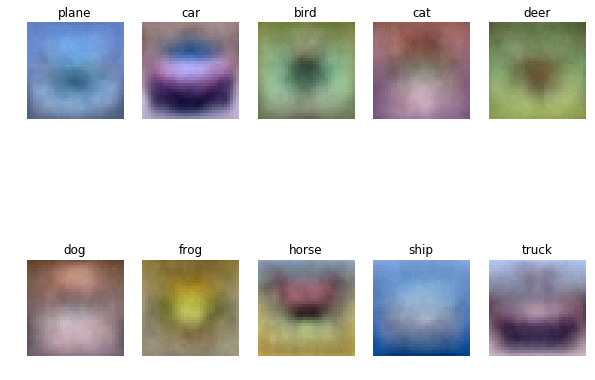

In [15]:
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])